In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image





In [24]:
df = pd.read_csv('fashion_train.csv')



In [25]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Separate features and labels

X = df.drop('label', axis=1).values
y = df['label'].values

# Normalize pixel values to [0, 1]
X = X / 255.0

# Reshape to (28, 28, 1) for CNN
X = X.reshape(-1, 28, 28, 1)


In [27]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

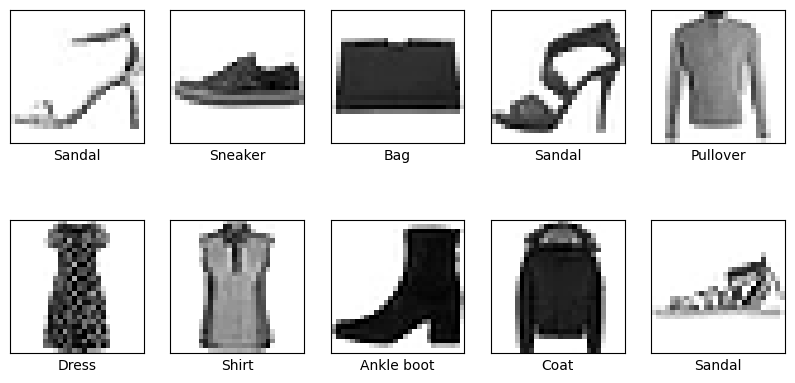

In [29]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])  # Remove x ticks
    plt.yticks([])  # Remove y ticks
    plt.grid(False)  # Remove grid lines
    plt.imshow(X_train[i], cmap=plt.cm.binary)  # Show image in grayscale
    plt.xlabel(class_names[y_train[i]])  # Label the image
plt.show()

In [30]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 fashion categories
])








C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [32]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=64, verbose=1)

Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.7373 - loss: 0.7331 - val_accuracy: 0.8385 - val_loss: 0.4209
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8675 - loss: 0.3627 - val_accuracy: 0.8779 - val_loss: 0.3306
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8897 - loss: 0.3030 - val_accuracy: 0.8863 - val_loss: 0.3197
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9013 - loss: 0.2711 - val_accuracy: 0.8960 - val_loss: 0.2863
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9101 - loss: 0.2405 - val_accuracy: 0.9035 - val_loss: 0.2601
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.9220 - loss: 0.2128 - val_accuracy: 0.9106 - val_loss: 0.2636
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9299 - loss: 0.1922 - val_accuracy: 0.9073 - val_loss: 0.2627
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.9369 - loss: 0.1719 - v

In [33]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9093 - loss: 0.2631
Test Accuracy: 0.9072


In [34]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


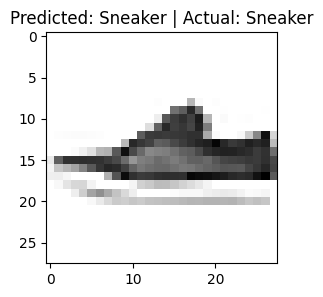

In [35]:
# Show sample prediction
plt.figure(figsize=(6,3))
plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.binary)
plt.title(f"Predicted: {class_names[np.argmax(y_pred[0])]} | Actual: {class_names[y_test[0]]}")
plt.show()

In [36]:
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1232
           1       1.00      0.96      0.98      1174
           2       0.84      0.89      0.87      1200
           3       0.90      0.91      0.91      1242
           4       0.88      0.81      0.84      1185
           5       0.99      0.97      0.98      1141
           6       0.70      0.80      0.75      1243
           7       0.95      0.98      0.97      1224
           8       0.98      0.98      0.98      1149
           9       0.98      0.96      0.97      1210

    accuracy                           0.91     12000
   macro avg       0.91      0.91      0.91     12000
weighted avg       0.91      0.91      0.91     12000



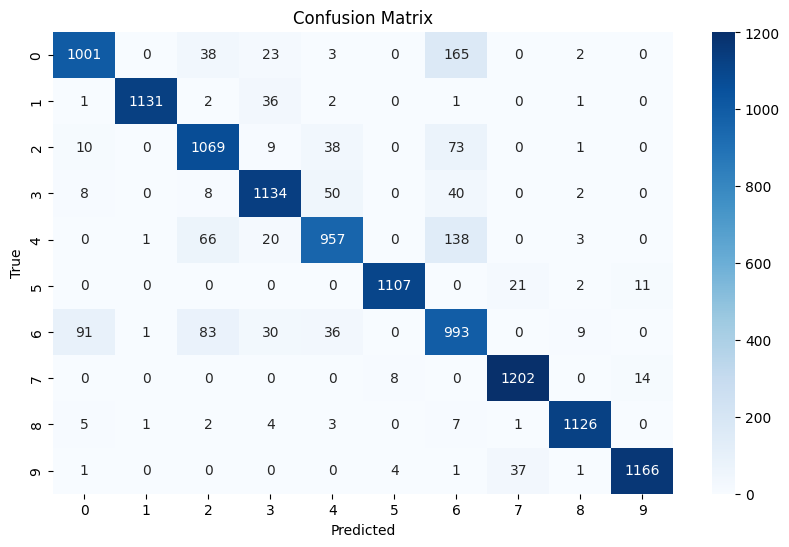

In [37]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

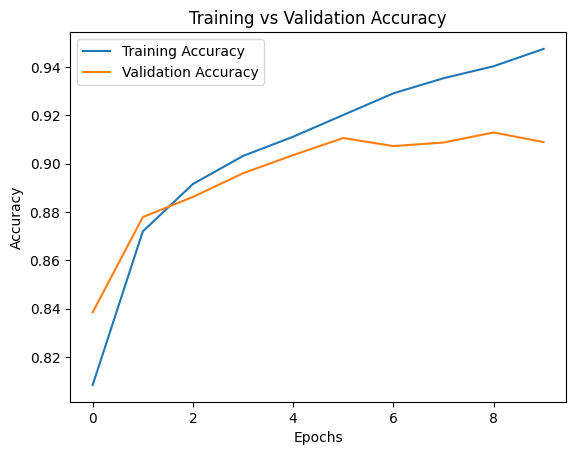

In [38]:
# Plot training/validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()